# Prediksi Harga Rumah Menggunakan Random Forest

### Pertama kita load dataset yang akan digunakan dan kita ekplorasi data yang digunakan
---

In [1]:
# Import library, khususnya RandomForest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics,preprocessing
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('melb_data.csv', index_col=0)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Show rangkuman statistik
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
# Show missing value
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

### Setelah di analisa ternyata dataset ini memiliki missing value yang terbilang banyak, untuk saat ini kita akan menghiraukan dan menghapus data yang memiliki missing value tersebut
---

In [5]:
# Drop semua data yang memiliki value NaN
new_df = df.copy()
new_df = new_df.dropna()

### Masuk ke tahap filter
---

### Kita akan menghapus semua fitur yang bukan merupakan nilai numerik

In [6]:
# Delete df yang bukan numerik
no_strings = new_df.drop(['Suburb','Address','Method','SellerG','Date','Regionname','CouncilArea','Type'],axis=1)

# Delete df dengan batasan tahun, area, dan ukuran lahan
no_strings = no_strings.drop(no_strings[no_strings.YearBuilt<1800].index)
no_strings = no_strings.drop(no_strings[no_strings.BuildingArea>2000].index)
no_strings = no_strings.drop(no_strings[no_strings.Landsize>24000].index)

In [7]:
# Show df yang telah di filter
no_strings.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


In [8]:
# Menyimpan feature Price pada variabel Y dan sisanya di variabel X
Y = no_strings.Price
x = X = no_strings.drop(['Price'],axis=1)

X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


### Karena ada cukup perbedaan antara varian nilai, kita akan menormalisasikannya. Dengan begitu, kita bisa fit data tersebut.

In [9]:
# Melakukan fitting data
min_max = MinMaxScaler()
X = min_max.fit_transform(X)

In [10]:
# Pemisahan data: test & train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Setelah membagi menjadi train set dan test set, kita melakukan pembuatan model dengan menggunakan metode Random Forest

In [11]:
# Pembangunan model RF
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Mempersiapkan data untuk menampilkan akurasi dan RMSE
y_pred = rf.predict(X_test)
acc_score = rf.score(X_test, y_test)

# Menampilkan tingkat akurasi dan rata-rata kesalahan kuadrat
print('Hasil:\n----------------')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Accuracy Score is: {}'.format(acc_score))

Hasil:
----------------
RMSE score: 277109.10964345885
Accuracy Score is: 0.816051132900901


# Melakukan analisis pada faktor(fitur) yang paling signifikan berdampak pada Harga

### Memerika fitur mana yang paling signifikan, kita akan memerika korelasi antara setiap fitur dan variabel yang kami inginkan yaitu Harga

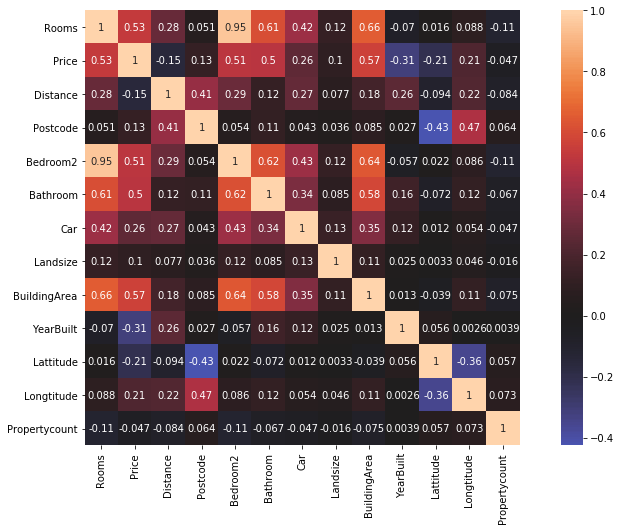

In [12]:
# Memeriksa korelasi antar fitur
no_strings_corr = no_strings._get_numeric_data()
plt.figure(figsize=(15,8))
sb.heatmap(no_strings_corr.corr(),annot=True,center=0,square=True)

### Setelah kita bisa melihat korelasi antar setiap fitur dan hasil tersebut kita akan plot

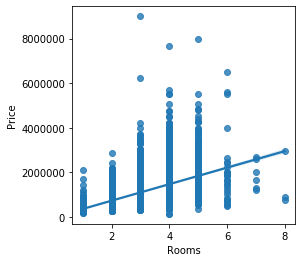

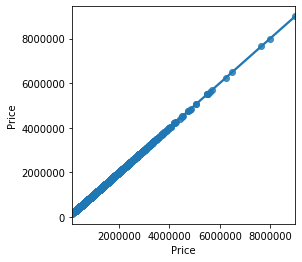

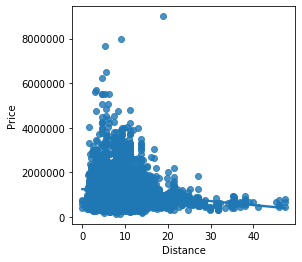

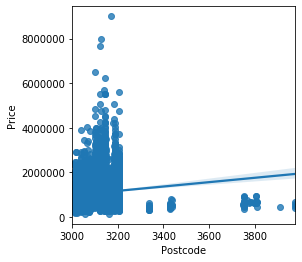

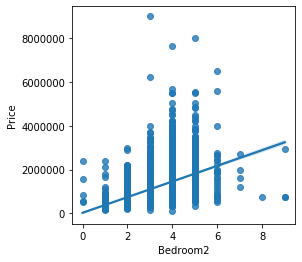

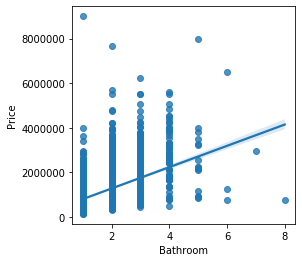

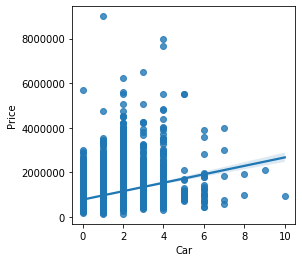

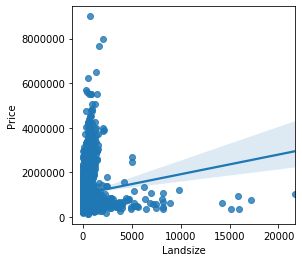

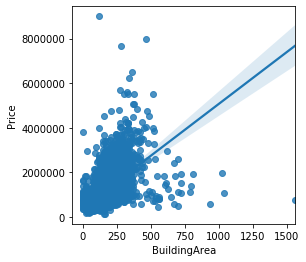

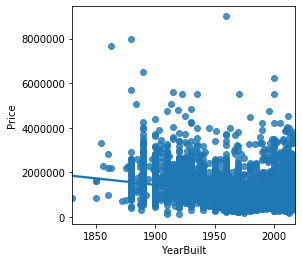

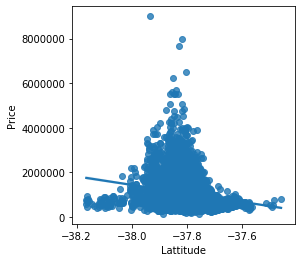

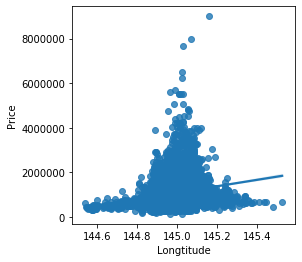

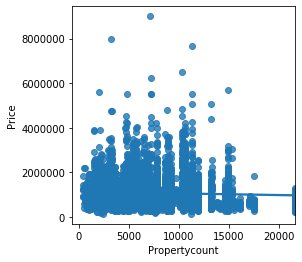

In [13]:
# Plotting data
for i in no_strings:
    plt.figure(figsize = (4,4))
    sb.regplot(data = no_strings, x = i, y = 'Price')
    plt.show()

### Sebelumnya kita telah melakukan pembuatan model dengan menghapus semua missing value, disini kita menggunakan cara yang berbeda yaitu dengan mengisi missing value dengan nilai 0 atau mean dari kolom

In [14]:
even_newer_df = df.copy()
even_newer_df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

### Disini kita akan mengisi nilai pada missing value dengan mean setiap kolom

In [15]:
mean_df = even_newer_df.fillna(even_newer_df.mean())
mean_df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      6163
Lattitude           0
Longtitude          0
Regionname          1
Propertycount       0
dtype: int64

### Kita dapat lihat bahwa masih ada beberapa kolom yang memiliki missing value, itu terjadi karena kolom-kolom tersebut adalah tipe string dan tidak memiliki nilai rata-rata. Saat ini kita akan menghapus kolom tersebut.

In [16]:
mean_df = mean_df.drop(['CouncilArea','Regionname'],axis=1)

In [17]:
mean_nostrings = mean_df.drop(['Suburb','Address','Method','SellerG','Date','Type'],axis=1)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.YearBuilt<1800].index)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.BuildingArea>2000].index)
mean_nostrings = mean_nostrings.drop(mean_nostrings[mean_nostrings.Landsize>24000].index)
mean_nostrings.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.220219,1965.879996,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.000000,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.000000,-37.8093,144.9944,4019.0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.220219,1965.879996,-37.7969,144.9969,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.000000,-37.8072,144.9941,4019.0


In [18]:
meanY = mean_nostrings.Price
meanX = mean_nostrings.drop(['Price'],axis=1)

In [19]:
mean_minmax = MinMaxScaler()
meanX = mean_minmax.fit_transform(meanX)

In [20]:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(meanX, meanY, test_size=0.2, random_state=42)

In [21]:
rf2 = RandomForestRegressor(n_estimators=100,random_state=42)
rf2.fit(X_train_mean, y_train_mean)
y_pred_mean = rf2.predict(X_test_mean)
acc_score2 = rf2.score(X_test_mean, y_test_mean)
print('Hasil:\n-------------')
print('RMSE score: {}'.format(np.sqrt(metrics.mean_squared_error(y_test_mean, y_pred_mean))))
print('Accuracy Score is: {}'.format(acc_score2))

Hasil:
-------------
RMSE score: 317596.4597261129
Accuracy Score is: 0.7583695154376695


### Dapat dilihat hasil ketika kita mengisi nilai pada missing value dengan mean setiap kolom, akurasi yang didapat lebih rendah